In this project, you want to create a model that predicts to classify comments into different categories. Comments in social media are often abusive and insulting. Organizations often want to ensure that conversations don’t get too negative. This project was a Kaggle challenge, where the participants had to suggest a solution for classifying toxic comments in several categories using NLP methods.

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [125]:
data = pd.read_csv('train.csv', error_bad_lines=False)#This line ignores problematic lines while reading "train.csv" to prevent parsing errors during data loading.
data.head()

<ipython-input-125-3f17bc699908>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('train.csv', error_bad_lines=False)#This line ignores problematic lines while reading "train.csv" to prevent parsing errors during data loading.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
111426,541871fbe9e43350,"""\n\n 2006 clean up \n\nHi Yboy. I've given a ...",0.0,0.0,0.0,0.0,0.0,0.0
111427,541884e1031acd43,"""\n\nSeason 1: 1993\n # Title Airdate Prod. Co...",0.0,0.0,0.0,0.0,0.0,0.0
111428,5418aa25c83dbb5e,"""\n\n Justin Bieber \n\nSee my reply at User t...",0.0,0.0,0.0,0.0,0.0,0.0
111429,541c0700a32c6dc4,"""\nI did put up that message when fixing the a...",0.0,0.0,0.0,0.0,0.0,0.0
111430,541d79805664fdd4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70457,bc8091bc26136974,"People, wake up... \n\nThis has got to be the ...",1,0.0,0.0,0.0,0.0,0.0
8623,16e4fcd24246c9c1,Stop editing indian history related articles\n...,0,0.0,0.0,0.0,0.0,0.0
111281,5353a50efac4e9bc,""" """"He has Risen! Hallelujah!"""" And guess what...",0,0.0,0.0,0.0,0.0,0.0
37868,6519968706023c1c,"""\nThis is the very reason why I have implemen...",0,0.0,0.0,0.0,0.0,0.0
92087,f630c478f923702d,I am familiar with the kind of template. Addin...,0,0.0,0.0,0.0,0.0,0.0


In [127]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,111430.000000,111430.000000,111430.000000,111430.000000,111430.000000,111430.000000
mean,0.096114,0.009881,0.053065,0.003069,0.049457,0.008561
std,0.294749,0.098910,0.224164,0.055315,0.216821,0.092131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
data.dtypes

id                object
comment_text      object
toxic            float64
severe_toxic     float64
obscene          float64
threat           float64
insult           float64
identity_hate    float64
dtype: object

In [129]:
data.shape

(111431, 8)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111431 entries, 0 to 111430
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             111431 non-null  object 
 1   comment_text   111430 non-null  object 
 2   toxic          111430 non-null  float64
 3   severe_toxic   111430 non-null  float64
 4   obscene        111430 non-null  float64
 5   threat         111430 non-null  float64
 6   insult         111430 non-null  float64
 7   identity_hate  111430 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.8+ MB


In [144]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [143]:
data.count()

id               111430
comment_text     111430
toxic            111430
severe_toxic     111430
obscene          111430
threat           111430
insult           111430
identity_hate    111430
dtype: int64

In [131]:
data[data.duplicated()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


<ipython-input-146-b764711d9f67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

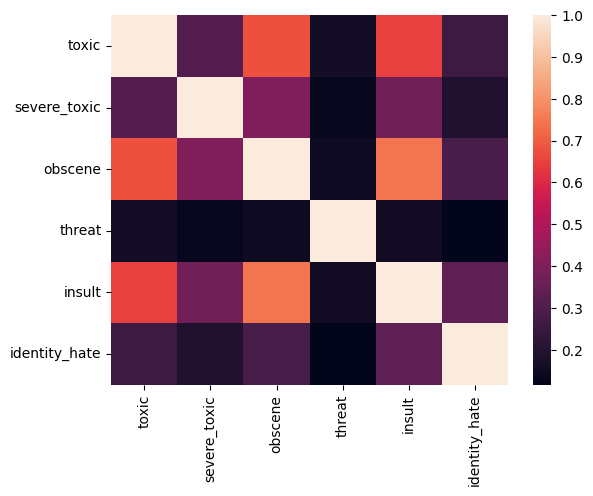

In [146]:
import seaborn as sns
sns.heatmap(data.corr())

In [132]:
# Preprocessing: Convert labels to binary
data = data.dropna()
data['toxic'] = (data['toxic'] > 0).astype(int)#This line removes rows with missing values and converts 'toxic' labels to binary format.

<ipython-input-132-333b91c43381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['toxic'] = (data['toxic'] > 0).astype(int)#This line removes rows with missing values and converts 'toxic' labels to binary format.


In [133]:
# Split dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [134]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [135]:
# Vectorize the comments
X_train = vectorizer.fit_transform(train_data['comment_text'])
X_test = vectorizer.transform(test_data['comment_text'])

In [136]:
# Create and train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_data['toxic'])

MultinomialNB()

In [137]:
# Example comments to classify
example_comments = [
    "This is a friendly message.",
    "You're an amazing person.",
    "You are terrible and should be ashamed.",
    "I love your work!",
    "COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK",
]

In [138]:
# Vectorize and classify the example comments
X_examples = vectorizer.transform(example_comments)
predictions = classifier.predict(X_examples)

In [139]:
# Print the results for example comments
for comment, prediction in zip(example_comments, predictions):
    toxic_label = "toxic" if prediction else "not toxic"
    print(f"Comment: {comment}")
    print(f"Prediction: {toxic_label}\n") #Loop through comments and predictions to print comment and its toxicity prediction (toxic or not toxic) accordingly.


Comment: This is a friendly message.
Prediction: not toxic

Comment: You're an amazing person.
Prediction: not toxic

Comment: You are terrible and should be ashamed.
Prediction: not toxic

Comment: I love your work!
Prediction: not toxic

Comment: COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
Prediction: toxic



In [140]:
# Evaluate the model on the test set
test_predictions = classifier.predict(X_test)
accuracy = accuracy_score(test_data['toxic'], test_predictions)
report = classification_report(test_data['toxic'], test_predictions)
#Make predictions on test set, calculate accuracy, and generate classification report using predicted and actual toxic labels.

In [141]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     20186
           1       0.95      0.46      0.62      2100

    accuracy                           0.95     22286
   macro avg       0.95      0.73      0.80     22286
weighted avg       0.95      0.95      0.94     22286

